## Data analysis of marketing data

In [179]:
# Data type description for dataset columns
DataType = {"cookieId":"string",
            "cuid":"string"}   # dtype =

DateTimeID = ['periodStartDate'] # parse_dates =

ColList = ["datetime", "cookieId"]  #  usecols=ColList

In [180]:
import pandas as pd
import sys
import json
import ipywidgets as widgets
encoding = sys.getdefaultencoding()

import plotly.express as px
import plotly.graph_objects as go
pd.options.plotting.backend = "plotly"

#### TDOO list:
* plot function
* select function
* fitting function
* cross-fold testing
* fitting curve 

#### Data format
*

#### API description:
*

In [181]:
#df = pd.read_json('MarketingReport.json',encoding = "iso8859_2", dtype =DataType)
df = pd.read_csv('MarketingReport_3.csv', sep="\t")
df.head(10)

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3072: DtypeWarning:

Columns (9) have mixed types.Specify dtype option on import or set low_memory=False.



,account,businessUnit,periodCode,reportGranularity,salesChannel,platformId,platformCode,channelId,channelCode,tagCodes,...,conversions,deliveries,netRevenue,grossProfit,currencyCode,appliedAttributionModel,views,adGroup,newConversions,periodStartDate
0,audiopartner,kytaryro,20190101,Daily,online,280_unpaid,unpaid,280_direct,direct,NaN,...,1,0,0.0,0.00,CZK,lastTouch,0,(not set),1,2019-01-01T00:00:00.0000000
1,audiopartner,kytaryro,20190101,Daily,online,280_adwords,AdWords,280_googleadsdsother,googleadsdsother,NaN,...,0,0,0.0,0.00,CZK,lastTouch,0,(not set),0,2019-01-01T00:00:00.0000000
2,audiopartner,kytaryro,20190101,Daily,online,280_unpaid,unpaid,280_organic,organic,NaN,...,1,1,1997.8,348.94,CZK,lastTouch,0,(not set),1,2019-01-01T00:00:00.0000000
3,audiopartner,kytaryro,20190101,Daily,online,280_compari,Compari,280_compari,compari,NaN,...,0,0,0.0,0.00,CZK,lastTouch,0,NaN,0,2019-01-01T00:00:00.0000000
4,audiopartner,kytaryro,20190101,Daily,online,280_adwords,AdWords,280_googleadsdsother,googleadsdsother,NaN,...,0,0,0.0,0.00,CZK,lastTouch,0,(not set),0,2019-01-01T00:00:00.0000000
5,audiopartner,kytaryro,20190101,Daily,online,280_unpaid,unpaid,280_notset,notset,NaN,...,0,0,0.0,0.00,CZK,lastTouch,0,all,0,2019-01-01T00:00:00.0000000
6,audiopartner,kytaryro,20190101,Daily,online,280_unpaid,unpaid,280_direct,direct,NaN,...,0,0,0.0,0.00,CZK,lastTouch,0,all,0,2019-01-01T00:00:00.0000000
7,audiopartner,kytaryro,20190101,Daily,online,280_unpaid,unpaid,280_organic,organic,NaN,...,0,0,0.0,0.00,CZK,lastTouch,0,all,0,2019-01-01T00:00:00.0000000
8,audiopartner,kytaryro,20190101,Daily,online,280_adwords,AdWords,280_googleadsdsother,googleadsdsother,NaN,...,0,0,0.0,0.00,CZK,lastTouch,0,Kytary,0,2019-01-01T00:00:00.0000000
9,audiopartner,kytaryro,20190101,Daily,online,280_adwords,AdWords,280_googleadsdsother,googleadsdsother,NaN,...,0,0,0.0,0.00,CZK,lastTouch,0,Akai EWI USB,0,2019-01-01T00:00:00.0000000


In [182]:
df.shape

(552145, 28)

In [183]:
df["periodStartDate"].head()

0    2019-01-01T00:00:00.0000000
1    2019-01-01T00:00:00.0000000
2    2019-01-01T00:00:00.0000000
3    2019-01-01T00:00:00.0000000
4    2019-01-01T00:00:00.0000000
Name: periodStartDate, dtype: object

In [184]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 552145 entries, 0 to 552144
Data columns (total 28 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   account                  552145 non-null  object 
 1   businessUnit             552145 non-null  object 
 2   periodCode               552145 non-null  int64  
 3   reportGranularity        552145 non-null  object 
 4   salesChannel             552145 non-null  object 
 5   platformId               552145 non-null  object 
 6   platformCode             552145 non-null  object 
 7   channelId                552145 non-null  object 
 8   channelCode              552145 non-null  object 
 9   tagCodes                 29731 non-null   object 
 10  site                     552145 non-null  object 
 11  adSource                 552145 non-null  object 
 12  adMedium                 552145 non-null  object 
 13  adCampaign               539847 non-null  object 
 14  mark

In [185]:
df.describe()

,periodCode,marketingInvestment,impressions,clicks,visits,conversions,deliveries,netRevenue,grossProfit,views,newConversions
count,5.521450e+05,552145.000000,5.521450e+05,552145.000000,552145.000000,552145.000000,552145.000000,5.521450e+05,552145.000000,552145.0,552145.000000
mean,2.019066e+07,34.793451,5.705076e+02,8.752681,17.005816,0.438760,0.403472,1.247430e+03,327.842636,0.0,0.170044
std,3.533128e+02,338.041268,1.163864e+04,50.157213,162.964540,5.846953,5.523954,1.642993e+04,4622.899785,0.0,1.780237
min,2.019010e+07,-2220.820000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,-4.766428e+04,-79762.730000,0.0,0.000000
25%,2.019033e+07,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.0,0.000000
50%,2.019063e+07,0.000000,0.000000e+00,0.000000,1.000000,0.000000,0.000000,0.000000e+00,0.000000,0.0,0.000000
75%,2.019101e+07,5.180000,3.000000e+01,2.000000,3.000000,0.000000,0.000000,0.000000e+00,0.000000,0.0,0.000000
max,2.019123e+07,40859.550000,3.735211e+06,3965.000000,9014.000000,408.000000,397.000000,1.247776e+06,588690.900000,0.0,176.000000


In [186]:
#df.isnull().sum()

In [187]:
df['currencyCode'].unique()

array(['CZK'], dtype=object)

In [188]:
df['platformId'].unique().size

96

In [189]:
df['channelId'].unique().size

159

In [190]:
df['conversions'].unique().size

237

In [191]:
#df['adCampaign'].head(30)
compaigns = df.adCampaign.unique().tolist()
print(compaigns, '\n Data type:', type(compaigns), '\n Size of the list:', len(compaigns))

[nan, '-', '(not set)', 'all', 'Brand', 'BW (Product) - Dechy a příslušenství', 'BW (Product) - Dechy a příslušenství (non-brand)', 'BW (Product) - Klavesy a prislusenstvi (non-brand)', 'BW (Product) - Kytary a prislusenstvi', 'BW (Product) - Kytary a prislusenstvi (non-brand)', 'BW (Product) - Zvuk a prislusenstvi', 'BW (Product) - Zvuk a prislusenstvi (non-brand)', 'DSA - produkty', 'facebook.com', 'Klávesy - obecná', 'Kytary - obecná', 'l.facebook.com', 'lm.facebook.com', 'm.facebook.com', 'NotifikaceAktivaceBonusu', 'NotifikaceExpiraceBonusu', 'Obsah - Remarketing - Akce', 'PotvrzeniObjednavky', 'PotvrzeniSouhlasu', 'promoter_posts_engagement_mobile', 'Promoter-A-Engagement (RO) DESKTOP', 'Promoter-A-Engagement (RO) MOBILE', 'Promoter-A-Link Clicks (RO)', 'yot_email_anarchiero', 'yot_email_pfro', 'yot_popup_welcome_optin', 'accesorii-portabile-audio-video', 'BW (Product) - Bici a prislusenstvi (non-brand)', 'BW (Product) - Smyčce a příslušenství', 'Dechy - obecná', 'Klávesy - značk

In [299]:
platform_code = df.platformCode.unique().tolist()
print(platform_code, '\n Data type:', type(platform_code), '\n Size of the list:', len(platform_code))

['unpaid', 'AdWords', 'Compari', 'FacebookBusinessAdsManager', 'Adminis', 'Yottly', 'Not tracked', 'Organic', 'Idealo', 'Ceneo', 'Internal', 'Adform', 'CjAffiliate', 'Arukereso', 'Olcsobbat', 'HeurekaCz', 'Sklik', 'OneSignal', 'ZboziCz', 'RtbHouse', 'Samba', 'Radio', 'Outdoor', 'POS', 'Promo_materialy', 'Print', 'Pricespy', 'Bing', 'notset', 'HeurekaSk'] 
 Data type: <class 'list'> 
 Size of the list: 30


In [193]:
channel_code = df.channelCode.unique().tolist()
print(channel_code, '\n Data type:', type(channel_code), '\n Size of the list:', len(channel_code))

['direct', 'googleadsdsother', 'organic', 'compari', 'notset', 'facebookother', 'email', 'googleadsremarketing', 'promoterengagement', 'promoterlinkclicks', 'youtube', 'facebookremarketingcross', 'googleadspla', 'googleadsppcbee', 'Direct', 'googleadsother', 'referral', 'facebookremarketing', 'Ceneo', 'Internal', 'Adform', 'CjAffiliate', 'arukereso', 'olcsobbat', 'googleadsobecna', 'googleadsznacky', 'googleadsdsa', 'googleadsroiminer', 'googleadssbrand', 'googleadssee-think', 'googleadssmartdispaly', 'googleadssearch', 'HeurekaCz', 'internalreferral', 'openx', 'skliksearch', 'googleadsbrandsearch', 'sklikbrandsearch', 'sklikremarketing', 'sklikpla', 'pushchannel', 'ZboziCz', 'Affiliate', 'firmycz', 'promoterother', 'googleadsobsah', 'RtbHouse', 'sklikobsah', 'adwordsother', 'pricespy', 'internal', 'adwordsremarketing', 'adwordssmartshoppingcampaign', 'adwordsdsa', 'bing', 'adwordspla', 'adwordssmartshopping', 'idealo', 'googleadsbra', 'googleadsapr', 'HeurekaSk', 'googleadsbrand'] 
 D

In [194]:
#df[df['platformCode'] == platform_code[2]]

In [195]:
df['periodStartDate'] = pd.to_datetime(df['periodStartDate'])

In [196]:
#df['periodStartDate'] = df['periodStartDate'].dt.strftime('%U')
df

,account,businessUnit,periodCode,reportGranularity,salesChannel,platformId,platformCode,channelId,channelCode,tagCodes,...,conversions,deliveries,netRevenue,grossProfit,currencyCode,appliedAttributionModel,views,adGroup,newConversions,periodStartDate
0,audiopartner,kytaryro,20190101,Daily,online,280_unpaid,unpaid,280_direct,direct,NaN,...,1,0,0.0,0.00,CZK,lastTouch,0,(not set),1,2019-01-01
1,audiopartner,kytaryro,20190101,Daily,online,280_adwords,AdWords,280_googleadsdsother,googleadsdsother,NaN,...,0,0,0.0,0.00,CZK,lastTouch,0,(not set),0,2019-01-01
2,audiopartner,kytaryro,20190101,Daily,online,280_unpaid,unpaid,280_organic,organic,NaN,...,1,1,1997.8,348.94,CZK,lastTouch,0,(not set),1,2019-01-01
3,audiopartner,kytaryro,20190101,Daily,online,280_compari,Compari,280_compari,compari,NaN,...,0,0,0.0,0.00,CZK,lastTouch,0,NaN,0,2019-01-01
4,audiopartner,kytaryro,20190101,Daily,online,280_adwords,AdWords,280_googleadsdsother,googleadsdsother,NaN,...,0,0,0.0,0.00,CZK,lastTouch,0,(not set),0,2019-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
552140,audiopartner,kytarysk,20190127,Daily,online,34_yottly,Yottly,34_email,email,fixed,...,0,0,0.0,0.00,CZK,lastTouch,0,-,0,2019-01-27
552141,audiopartner,kytarysk,20190128,Daily,online,34_yottly,Yottly,34_email,email,fixed,...,0,0,0.0,0.00,CZK,lastTouch,0,-,0,2019-01-28
552142,audiopartner,kytarysk,20190129,Daily,online,34_yottly,Yottly,34_email,email,fixed,...,0,0,0.0,0.00,CZK,lastTouch,0,-,0,2019-01-29
552143,audiopartner,kytarysk,20190130,Daily,online,34_yottly,Yottly,34_email,email,fixed,...,0,0,0.0,0.00,CZK,lastTouch,0,-,0,2019-01-30


In [197]:
#df = df[df['platformCode'] == 'AdWords']

In [198]:
total_rev= df.groupby(['platformCode','periodStartDate'], as_index=False)[['netRevenue']].sum()

In [199]:
group_data = df.groupby(['periodStartDate']).agg({'netRevenue':'sum',
                                                 'marketingInvestment':'sum',
                                                 'visits':'sum',
                                                 'conversions':'sum',
                                                 'deliveries':'sum',
                                                 'impressions':'sum',
                                                 'clicks':'sum',
                                                 'grossProfit':'sum'})
group_data.head(10)

,netRevenue,marketingInvestment,visits,conversions,deliveries,impressions,clicks,grossProfit
periodStartDate,,,,,,,,
2019-01-01,476686.51,51595.28,26966,242,211,931859,18285,112505.45
2019-01-02,1413016.65,58245.27,34471,538,472,1036382,19863,317327.24
2019-01-03,1535926.14,55986.39,32919,474,432,950725,18842,357048.50
2019-01-04,2798999.31,47078.09,34258,882,805,855437,16578,645743.22
2019-01-05,1311820.45,38706.44,28298,535,481,714328,13891,381255.45
2019-01-06,1342289.89,41716.50,29817,491,444,872735,14978,317879.60
2019-01-07,2329503.02,48965.93,32318,834,762,884253,15192,580929.76
2019-01-08,2383081.16,41170.65,31040,813,735,726208,13607,576296.42
2019-01-09,1794998.16,40650.54,30157,777,710,696830,13566,492768.98


In [200]:
group_data['ROI'] = (group_data['grossProfit']/group_data['marketingInvestment'])*100
group_data['CPI'] = (group_data['marketingInvestment']/group_data['deliveries'])*100
group_data.head(10)

,netRevenue,marketingInvestment,visits,conversions,deliveries,impressions,clicks,grossProfit,ROI,CPI
periodStartDate,,,,,,,,,,
2019-01-01,476686.51,51595.28,26966,242,211,931859,18285,112505.45,218.053764,24452.739336
2019-01-02,1413016.65,58245.27,34471,538,472,1036382,19863,317327.24,544.812034,12340.099576
2019-01-03,1535926.14,55986.39,32919,474,432,950725,18842,357048.50,637.741601,12959.812500
2019-01-04,2798999.31,47078.09,34258,882,805,855437,16578,645743.22,1371.642775,5848.209938
2019-01-05,1311820.45,38706.44,28298,535,481,714328,13891,381255.45,984.992291,8047.076923
2019-01-06,1342289.89,41716.50,29817,491,444,872735,14978,317879.60,761.999688,9395.608108
2019-01-07,2329503.02,48965.93,32318,834,762,884253,15192,580929.76,1186.395847,6425.975066
2019-01-08,2383081.16,41170.65,31040,813,735,726208,13607,576296.42,1399.774888,5601.448980
2019-01-09,1794998.16,40650.54,30157,777,710,696830,13566,492768.98,1212.207710,5725.428169


In [201]:
group_data_w = group_data.resample('W-MON').agg('sum')
group_data_w['ROI'] = (group_data_w['grossProfit']/group_data_w['marketingInvestment'])*100
group_data_w['CPI'] = (group_data_w['marketingInvestment']/group_data_w['deliveries'])*100
group_data_w.head(10)

,netRevenue,marketingInvestment,visits,conversions,deliveries,impressions,clicks,grossProfit,ROI,CPI
periodStartDate,,,,,,,,,,
2019-01-07,11208241.97,342293.90,219047,3996,3607,6245719,117629,2712689.22,792.502940,9489.711672
2019-01-14,13963614.56,285424.40,205010,5088,4646,4565499,92685,3505869.08,1228.300412,6143.443823
2019-01-21,12517757.48,285409.64,192277,4514,4151,4151416,91313,3369107.41,1180.446256,6875.683932
2019-01-28,10522310.42,276260.13,190413,4147,3771,4514798,90839,3401136.96,1231.135655,7325.911695
2019-02-04,11680063.41,287621.79,195092,4122,3771,4714077,98707,2976843.82,1034.985500,7627.202068
2019-02-11,11453533.70,279320.47,189740,4267,3906,4521773,100546,2900958.24,1038.577029,7151.061700
2019-02-18,11364935.01,276900.51,183246,4256,3902,4091739,93670,3020571.29,1090.850750,7096.373911
2019-02-25,12071808.42,304766.38,185504,4316,3967,4187327,89340,3013307.63,988.727047,7682.540459
2019-03-04,11448563.17,309007.90,177447,4073,3716,4730412,91342,2932615.03,949.042089,8315.605490


In [202]:
group_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 365 entries, 2019-01-01 to 2019-12-31
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   netRevenue           365 non-null    float64
 1   marketingInvestment  365 non-null    float64
 2   visits               365 non-null    int64  
 3   conversions          365 non-null    int64  
 4   deliveries           365 non-null    int64  
 5   impressions          365 non-null    int64  
 6   clicks               365 non-null    int64  
 7   grossProfit          365 non-null    float64
 8   ROI                  365 non-null    float64
 9   CPI                  365 non-null    float64
dtypes: float64(5), int64(5)
memory usage: 31.4 KB


In [203]:
fig1 = group_data.plot()
fig1.update_layout(title_text="Figure discription", title_font=dict(size=20))
fig1.update_layout(uniformtext_minsize=16, uniformtext_mode='hide')
fig1.show()

In [204]:
fig3 = group_data_w.plot()
fig3.update_layout(title_text="Figure discription", title_font=dict(size=20))
fig3.update_layout(uniformtext_minsize=16, uniformtext_mode='hide')
fig3.show()

In [205]:
fig4 = group_data.plot(group_data, x = group_data.index, y = ['grossProfit','marketingInvestment','ROI','CPI'])
fig4.update_layout(title_text="Figure discription", title_font=dict(size=20))
fig4.update_layout(uniformtext_minsize=16, uniformtext_mode='hide')
fig4.show()

In [206]:
fig5 = group_data_w.plot(group_data_w, x = group_data_w.index, y = ['grossProfit','marketingInvestment','netRevenue'])
fig5.update_layout(title_text="Monthly grouped data", title_font=dict(size=20))
fig5.update_layout(uniformtext_minsize=16, uniformtext_mode='hide')
fig5.show()

In [207]:
fig6 = group_data_w.plot(group_data_w, x = group_data_w.index, y = ['ROI','CPI'])
fig6.update_layout(title_text="Figure discription", title_font=dict(size=20))
fig6.update_layout(uniformtext_minsize=16, uniformtext_mode='hide')
fig6.show()

In [208]:
group_data_sort = group_data.sort_values(by=['marketingInvestment'], ascending  = False)
fig7 = group_data_sort.plot.scatter(x = 'marketingInvestment', y = 'grossProfit')
fig7.update_layout(title_text="Figure discription", title_font=dict(size=20))
fig7.update_layout(uniformtext_minsize=16, uniformtext_mode='hide')
fig7.show()

In [209]:
group_data_sort = group_data.sort_values(
    by=['marketingInvestment'], ascending=False)
fig8 = group_data_sort.plot.scatter(x='marketingInvestment', y='netRevenue')
fig8.update_layout(title_text="Figure discription", title_font=dict(size=20))
fig8.update_layout(uniformtext_minsize=16, uniformtext_mode='hide')
fig8.show()

In [210]:
total_rev

,platformCode,periodStartDate,netRevenue
0,AdWords,2019-01-01,106439.59
1,AdWords,2019-01-02,226968.06
2,AdWords,2019-01-03,250949.17
3,AdWords,2019-01-04,272137.54
4,AdWords,2019-01-05,186231.73
...,...,...,...
8921,unpaid,2019-12-27,663615.97
8922,unpaid,2019-12-28,359828.83
8923,unpaid,2019-12-29,546314.31
8924,unpaid,2019-12-30,581631.28


In [211]:
market_invest= df.groupby(['platformCode','periodStartDate'], as_index=False)[['marketingInvestment']].sum() 
market_invest

,platformCode,periodStartDate,marketingInvestment
0,AdWords,2019-01-01,30144.39
1,AdWords,2019-01-02,36342.63
2,AdWords,2019-01-03,37037.12
3,AdWords,2019-01-04,28560.95
4,AdWords,2019-01-05,21761.36
...,...,...,...
8921,unpaid,2019-12-27,0.00
8922,unpaid,2019-12-28,0.00
8923,unpaid,2019-12-29,0.00
8924,unpaid,2019-12-30,0.00


In [212]:
market_invest.groupby(['platformCode'], 
                      as_index=True)[['marketingInvestment']].sum().sort_values(by=['marketingInvestment'], 
                                                                                 ascending  = False)

,marketingInvestment
platformCode,
AdWords,10602969.80
Adform,1279186.81
FacebookBusinessAdsManager,1191521.50
Radio,1080737.55
Sklik,1070710.59
Arukereso,717533.07
HeurekaCz,644856.11
Yottly,611901.93
HeurekaSk,521201.12


In [213]:
import plotly.express as px
import plotly.graph_objects as go
pd.options.plotting.backend = "plotly"


In [214]:
fig8 = group_data.plot(x = group_data.index, y = 'netRevenue', kind = "bar")
fig8.update_layout(title_text = "Total net revenue", title_font = dict(size = 20))
fig8.update_layout(uniformtext_minsize = 16, uniformtext_mode = 'hide')
fig8.show()

In [215]:
fig9 = group_data.plot(x=group_data.index, y='marketingInvestment', kind="bar")
fig9.update_layout(title_text="Total marketing investment",
                   title_font=dict(size=20))
fig9.update_layout(uniformtext_minsize=16, uniformtext_mode='hide')
fig9.show()

## Main settings
* Data preparation 

In [216]:
data_source = widgets.Dropdown(
    options = ['platform','compaign','channel'],
    value='platform',
    description='Data source:',
    disabled=False,
)
display(data_source)

Dropdown(description='Data source:', options=('platform', 'compaign', 'channel'), value='platform')

In [217]:
data_source.value

'platform'

In [301]:
if 'all' not in platform_code: platform_code.insert(0, 'all')
platform = widgets.Dropdown(
    options = platform_code,
    value='all',
    description='Platform:',
    disabled=False,
)
display(platform)

Dropdown(description='Platform:', options=('all', 'unpaid', 'AdWords', 'Compari', 'FacebookBusinessAdsManager'…

In [219]:
platform.value

'all'

In [220]:
granularity = widgets.Dropdown(
    options = ['day','week','month'],
    value='week',
    description='Granularity:',
    disabled=False,
)
display(granularity)

Dropdown(description='Granularity:', index=1, options=('day', 'week', 'month'), value='week')

In [221]:
granularity.value

'week'

In [222]:
if '__Null__' not in compaigns: compaigns.insert(0, '__Null__')
compaigns_list = widgets.Dropdown(
    options = compaigns,
    value='__Null__',
    description='Compaigns code:',
    disabled=False,
)
display(compaigns_list)

Dropdown(description='Compaigns code:', options=('__Null__', nan, '-', '(not set)', 'all', 'Brand', 'BW (Produ…

In [223]:
compaigns_list.value

'__Null__'

## Curve fitting  

In [262]:
### Data preprocessing
#df['periodStartDate'] = pd.to_datetime(df['periodStartDate'])

if platform.value == 'all': 
    df_selected = df 
else: 
    df_selected = df[df['platformCode'] == platform.value]


In [263]:
df_selected.head()

,account,businessUnit,periodCode,reportGranularity,salesChannel,platformId,platformCode,channelId,channelCode,tagCodes,...,netRevenue,grossProfit,currencyCode,appliedAttributionModel,views,adGroup,newConversions,periodStartDate,ROI,CPI
1,audiopartner,kytaryro,20190101,Daily,online,280_adwords,AdWords,280_googleadsdsother,googleadsdsother,NaN,...,0.0,0.0,CZK,lastTouch,0,(not set),0,2019-01-01,NaN,NaN
4,audiopartner,kytaryro,20190101,Daily,online,280_adwords,AdWords,280_googleadsdsother,googleadsdsother,NaN,...,0.0,0.0,CZK,lastTouch,0,(not set),0,2019-01-01,NaN,NaN
8,audiopartner,kytaryro,20190101,Daily,online,280_adwords,AdWords,280_googleadsdsother,googleadsdsother,NaN,...,0.0,0.0,CZK,lastTouch,0,Kytary,0,2019-01-01,0.0,inf
9,audiopartner,kytaryro,20190101,Daily,online,280_adwords,AdWords,280_googleadsdsother,googleadsdsother,NaN,...,0.0,0.0,CZK,lastTouch,0,Akai EWI USB,0,2019-01-01,NaN,NaN
10,audiopartner,kytaryro,20190101,Daily,online,280_adwords,AdWords,280_googleadsdsother,googleadsdsother,NaN,...,0.0,0.0,CZK,lastTouch,0,Buffet Crampon 100 Series Tenor,0,2019-01-01,0.0,inf


In [264]:
df_selected_agg = df_selected.groupby(['periodStartDate']).agg({'netRevenue':'sum',
                                                 'marketingInvestment':'sum',
                                                 'visits':'sum',
                                                 'conversions':'sum',
                                                 'deliveries':'sum',
                                                 'impressions':'sum',
                                                 'clicks':'sum',
                                                 'grossProfit':'sum'})
df_selected_agg.head(5)

,netRevenue,marketingInvestment,visits,conversions,deliveries,impressions,clicks,grossProfit
periodStartDate,,,,,,,,
2019-01-01,106439.59,30144.39,9907,65,49,599737,10109,23731.45
2019-01-02,226968.06,36342.63,12727,138,119,711540,12703,60771.04
2019-01-03,250949.17,37037.12,12885,110,94,712806,12808,54783.53
2019-01-04,272137.54,28560.95,10940,103,88,621273,10765,59464.18
2019-01-05,186231.73,21761.36,9240,81,65,574806,8857,29828.59


In [265]:
if granularity.value == 'week':
    df_selected_agg = df_selected_agg.resample('W-MON').agg('sum')
if granularity.value == 'month':
    df_selected_agg = df_selected_agg.resample('M', convention='end').agg('sum')
else:
    pass

df_selected_agg['ROI'] = (df_selected_agg['grossProfit']/df_selected_agg['marketingInvestment'])*100
df_selected_agg['CPI'] = (df_selected_agg['marketingInvestment']/df_selected_agg['deliveries'])*100
df_selected_agg.head(5)

,netRevenue,marketingInvestment,visits,conversions,deliveries,impressions,clicks,grossProfit,ROI,CPI
periodStartDate,,,,,,,,,,
2019-01-01,106439.59,30144.39,9907,65,49,599737,10109,23731.45,78.725925,61519.163265
2019-01-02,226968.06,36342.63,12727,138,119,711540,12703,60771.04,167.216957,30540.025210
2019-01-03,250949.17,37037.12,12885,110,94,712806,12808,54783.53,147.915200,39401.191489
2019-01-04,272137.54,28560.95,10940,103,88,621273,10765,59464.18,208.200988,32455.625000
2019-01-05,186231.73,21761.36,9240,81,65,574806,8857,29828.59,137.071350,33479.015385


In [266]:
df_selected_agg.head(5)

,netRevenue,marketingInvestment,visits,conversions,deliveries,impressions,clicks,grossProfit,ROI,CPI
periodStartDate,,,,,,,,,,
2019-01-01,106439.59,30144.39,9907,65,49,599737,10109,23731.45,78.725925,61519.163265
2019-01-02,226968.06,36342.63,12727,138,119,711540,12703,60771.04,167.216957,30540.025210
2019-01-03,250949.17,37037.12,12885,110,94,712806,12808,54783.53,147.915200,39401.191489
2019-01-04,272137.54,28560.95,10940,103,88,621273,10765,59464.18,208.200988,32455.625000
2019-01-05,186231.73,21761.36,9240,81,65,574806,8857,29828.59,137.071350,33479.015385


In [267]:
fig_agg = df_selected_agg.plot.scatter(x = 'marketingInvestment', y = 'netRevenue')
fig_agg.update_layout(title_text = f"Revenue to investment on {platform.value} platform with {granularity.value} granularity", 
                      title_font = dict(size=20))
fig_agg.update_layout(uniformtext_minsize = 16, uniformtext_mode = 'hide')
fig_agg.show()

## Optimization problem 

In [292]:
from scipy.optimize import least_squares
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

In [282]:
def function(x, a, b):
    return a*(1 - np.exp(-(x/b)))


t_train = df_selected_agg['marketingInvestment'].tolist()
y_train = df_selected_agg['netRevenue'].tolist()

x0 = np.ones(3)

In [288]:
type(y_train)

list

C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:829: OptimizeWarning:

Covariance of the parameters could not be estimated

No handles with labels found to put in legend.


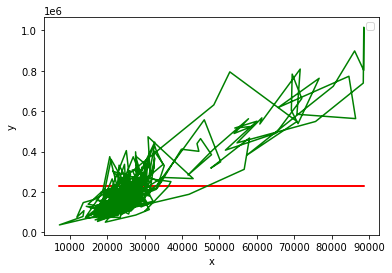

In [304]:
#res_lsq = least_squares(function, x0, args=(t_train, y_train))
popt, pcov = curve_fit(function, t_train, y_train)
popt

plt.plot(t_train, function(t_train, *popt), 'r-')
plt.plot(t_train, y_train, 'g-')

plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

In [302]:
popt

array([2.29767499e+05, 1.00000000e+00])

In [303]:
t_train

[30144.390000000003,
 36342.62999999996,
 37037.12,
 28560.950000000026,
 21761.35999999999,
 25906.67999999999,
 26896.25000000001,
 23179.239999999987,
 22492.969999999983,
 22505.30000000001,
 20557.770000000004,
 18438.11999999999,
 23780.429999999997,
 26292.030000000013,
 23936.699999999986,
 23690.91999999999,
 23711.74000000001,
 21499.949999999997,
 16969.969999999998,
 24253.45999999998,
 23848.249999999985,
 24737.88,
 26071.93000000003,
 23900.93,
 23610.44000000002,
 19135.129999999994,
 24940.460000000006,
 25725.140000000018,
 24330.090000000004,
 24287.31,
 24029.889999999996,
 23630.03000000001,
 19143.599999999988,
 26297.520000000022,
 28071.869999999995,
 25521.629999999994,
 24092.09999999999,
 25608.230000000007,
 21039.449999999997,
 18507.82,
 22986.04,
 25373.000000000015,
 24730.73999999998,
 24528.339999999993,
 22707.569999999996,
 21569.260000000006,
 16850.85999999999,
 23004.400000000005,
 27606.229999999996,
 29233.469999999987,
 29729.179999999986,
 263

In [295]:
plt.plot(t_train, function(t_train, *popt), 'r-',
         label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt))

plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

TypeError: not enough arguments for format string